In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
assert 'zipfile' in sys.modules
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
from collections import Counter

In [5]:
df = pd.read_csv('Data/Audience_LA.csv')

In [6]:
df.head(50)

,Unnamed: 0,ZIP,GENDER,AGE,STATE_ABBREVIATION,DMA_NAME_ACXIOM,DEMO_HH_INCOME,ETHNICITY,HOMEOWNERSHIP_STATUS,EDUCATION
0,0,71202,M,67.0,LA,Monroe-El Dorado,"$30,000 to $49,999",African American,Homeowner,High School
1,1,70438,F,33.0,LA,New Orleans,"$100,000 to $149,999",White,Renter,College
2,2,70770,F,59.0,LA,Baton Rouge,"Less than $30,000",White,Homeowner,College
3,3,71108,F,63.0,LA,Shreveport,"$30,000 to $49,999",African American,Homeowner,College
4,4,70802,F,81.0,LA,Baton Rouge,"Less than $30,000",African American,Homeowner,not_reported
5,5,70115,M,65.0,LA,New Orleans,"$30,000 to $49,999",African American,Renter,not_reported
6,6,70118,F,59.0,LA,New Orleans,"Less than $30,000",White,Homeowner,not_reported
7,7,70117,M,19.0,LA,New Orleans,"Less than $30,000",African American,Renter,High School
8,8,70006,F,29.0,LA,New Orleans,"$30,000 to $49,999",White,Renter,not_reported
9,9,70086,F,49.0,LA,New Orleans,"$100,000 to $149,999",African American,Renter,College


In [7]:
df.isna().sum()

Unnamed: 0                   0
ZIP                          0
GENDER                  128299
AGE                     258896
STATE_ABBREVIATION           0
DMA_NAME_ACXIOM              1
DEMO_HH_INCOME               0
ETHNICITY                    0
HOMEOWNERSHIP_STATUS         0
EDUCATION                    0
dtype: int64

# Dropping Null Values

In [8]:
# make gender M:0, F:1, NAN=3, and group 3 
#Lubah task
df.pivot_table(index='GENDER', columns='ETHNICITY', values="Unnamed: 0",aggfunc= 'count' )

ETHNICITY,African American,Asian,Hispanic,White
GENDER,,,,
F,414616,28768,85511,1352861
M,335718,29436,78969,1256140


In [9]:
df2= df.dropna()

In [10]:
df2.shape


(3388601, 10)

In [11]:
df.shape

(3710318, 10)

In [12]:
df2 = df2.rename(columns = {'ETHNICITY': 'RACE', 'Unnamed: 0':'ID'})


In [13]:
df2

,ID,ZIP,GENDER,AGE,STATE_ABBREVIATION,DMA_NAME_ACXIOM,DEMO_HH_INCOME,RACE,HOMEOWNERSHIP_STATUS,EDUCATION
0,0,71202,M,67.0,LA,Monroe-El Dorado,"$30,000 to $49,999",African American,Homeowner,High School
1,1,70438,F,33.0,LA,New Orleans,"$100,000 to $149,999",White,Renter,College
2,2,70770,F,59.0,LA,Baton Rouge,"Less than $30,000",White,Homeowner,College
3,3,71108,F,63.0,LA,Shreveport,"$30,000 to $49,999",African American,Homeowner,College
4,4,70802,F,81.0,LA,Baton Rouge,"Less than $30,000",African American,Homeowner,not_reported
...,...,...,...,...,...,...,...,...,...,...
3710313,3710313,70124,M,51.0,LA,New Orleans,"$75,000 to $99,999",Hispanic,Homeowner,College
3710314,3710314,71112,M,33.0,LA,Shreveport,"Less than $30,000",White,Renter,not_reported
3710315,3710315,70764,M,73.0,LA,Baton Rouge,"$50,000 to $74,999",White,Homeowner,High School
3710316,3710316,70534,M,35.0,LA,"Lafayette, LA","Less than $30,000",White,Renter,not_reported


In [14]:
pd.get_dummies(df2, columns=['DEMO_HH_INCOME'])

,ID,ZIP,GENDER,AGE,STATE_ABBREVIATION,DMA_NAME_ACXIOM,RACE,HOMEOWNERSHIP_STATUS,EDUCATION,"DEMO_HH_INCOME_$100,000 to $149,999","DEMO_HH_INCOME_$150,000 to $199,999","DEMO_HH_INCOME_$200,000 to $249,999","DEMO_HH_INCOME_$250,000 +","DEMO_HH_INCOME_$30,000 to $49,999","DEMO_HH_INCOME_$50,000 to $74,999","DEMO_HH_INCOME_$75,000 to $99,999","DEMO_HH_INCOME_Less than $30,000"
0,0,71202,M,67.0,LA,Monroe-El Dorado,African American,Homeowner,High School,0,0,0,0,1,0,0,0
1,1,70438,F,33.0,LA,New Orleans,White,Renter,College,1,0,0,0,0,0,0,0
2,2,70770,F,59.0,LA,Baton Rouge,White,Homeowner,College,0,0,0,0,0,0,0,1
3,3,71108,F,63.0,LA,Shreveport,African American,Homeowner,College,0,0,0,0,1,0,0,0
4,4,70802,F,81.0,LA,Baton Rouge,African American,Homeowner,not_reported,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710313,3710313,70124,M,51.0,LA,New Orleans,Hispanic,Homeowner,College,0,0,0,0,0,0,1,0
3710314,3710314,71112,M,33.0,LA,Shreveport,White,Renter,not_reported,0,0,0,0,0,0,0,1
3710315,3710315,70764,M,73.0,LA,Baton Rouge,White,Homeowner,High School,0,0,0,0,0,1,0,0
3710316,3710316,70534,M,35.0,LA,"Lafayette, LA",White,Renter,not_reported,0,0,0,0,0,0,0,1


In [15]:
df3 = df.groupby(by='DEMO_HH_INCOME').agg('count')

In [16]:
df3 = df3.drop(columns = ['ZIP','GENDER','AGE','ETHNICITY','HOMEOWNERSHIP_STATUS'])

In [17]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(df2[['ID', 'DEMO_HH_INCOME']])
df3 = df3.rename(columns = {'Unnamed: 0':'Count'})
df3

,Count,STATE_ABBREVIATION,DMA_NAME_ACXIOM,EDUCATION
DEMO_HH_INCOME,,,,
"$100,000 to $149,999",413865,413865,413865,413865
"$150,000 to $199,999",117973,117973,117973,117973
"$200,000 to $249,999",40223,40223,40223,40223
"$250,000 +",31266,31266,31266,31266
"$30,000 to $49,999",858037,858037,858037,858037
"$50,000 to $74,999",707368,707368,707368,707368
"$75,000 to $99,999",344328,344328,344328,344328
"Less than $30,000",1197258,1197258,1197257,1197258


In [18]:
#enc.categories_
df3.index

Index(['$100,000 to $149,999', '$150,000 to $199,999', '$200,000 to $249,999',
       '$250,000 +', '$30,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', 'Less than $30,000'],
      dtype='object', name='DEMO_HH_INCOME')

<Figure size 7200x720 with 0 Axes>

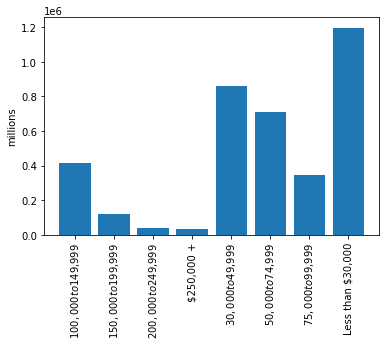

<Figure size 7200x720 with 0 Axes>

In [19]:
plt.xticks(rotation=90)
plt.ylabel('millions')
plt.bar(df3.index,df3['Count'])
plt.figure(figsize=(100,10))


In [20]:
#Setting global variables
_REPLACE = 'replace'
_DEFAULT_REPLACE_VALUE = 0.0


In [21]:
#replace nans with desired value
def replace_nan_with_value(x, y, value):
    x = np.array([v if v == v and v is not None else value for v in x])  # NaN != NaN
    y = np.array([v if v == v and v is not None else value for v in y])
    return x, y

In [22]:
#removing incomplete samples from dataset
def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


In [23]:
def conditional_entropy(x,y,
                        nan_strategy=_REPLACE,
                        nan_replace_value=_DEFAULT_REPLACE_VALUE,
                        log_base: float = math.e):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.
    Returns:
    --------
    float
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

In [24]:
def theils_u(x,
             y,
             nan_strategy=_REPLACE,
             nan_replace_value=_DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [25]:
theils_u(df2['RACE'],df2['HOMEOWNERSHIP_STATUS'])

0.025072376696563

In [26]:
conditional_entropy(df2['RACE'],df2['HOMEOWNERSHIP_STATUS'])

0.7302738113258033

In [27]:
def cramers_v(x,
              y,
              bias_correction=True,
              nan_strategy=_REPLACE,
              nan_replace_value=_DEFAULT_REPLACE_VALUE):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    bias_correction : Boolean, default = True
        Use bias correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328.
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    if bias_correction:
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        if min((kcorr - 1), (rcorr - 1)) == 0:
            warnings.warn(
                "Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False",
                RuntimeWarning)
            return np.nan
        else:
            return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    else:
        return np.sqrt(phi2 / min(k - 1, r - 1))
